# Project Title: Bike Sales Data Analysis

## Background

Bicycle sales continue to increase as public interest in healthy lifestyles and environmentally friendly transportation grows. However, changing market demand dynamics and increasing business competition require businesses to understand sales patterns more accurately. Therefore, an in-depth analysis of bicycle sales is required, such as identifying sales trends and customer characteristics, so that companies can develop appropriate marketing strategies and select and provide products that suit customer habits and needs.

## Analysis Purpose

The purpose of this project is to identify monthly bicycle sales trends in 2017, determine the most frequently purchased bicycle brands and categories, identify areas with the highest purchase rates, and understand customer habits and characteristics, such as occupation, gender, and other customer attributes.

## Business Questions
The following are some business questions regarding this project:

1. Which Brand is Most Frequently Purchased by Customers?
2. Which State Has the Highest of Customers?
3. Which Bicycle Brand Has High Sales?
4. How is the Monthly Bicycle Has the Highest Sales?
5. Which Category of Bicycle Has the Highest Sales?
6. Which Gender Frequently buys Cycle?
7. Which Region Has the Highest Sales of Bicycle?
8. How Are Customers Distributed Based on Wealth Segment?

# Dataset
[Dataset](https://www.kaggle.com/datasets/tforsyth/99bikes-sales-data/data)

# Preparation

## Import Libray

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Import Dataset

In [2]:
file_path='./Dataset/99Bikers_Raw_data.xlsx'

In [3]:
Transaction_df=pd.read_excel(file_path, sheet_name="Transactions")
Transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
Customer_address=pd.read_excel(file_path, sheet_name='CustomerAddress')
Customer_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [5]:
Customer_Demographic=pd.read_excel(file_path, sheet_name='CustomerDemographic')
Customer_Demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


# Data Understanding

## Transaction Data

In [6]:
Transaction_df.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,0.500458,1107.829449,556.046951,38199.776549
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,2091.470000,1759.850000,42710.000000
std,5773.647028,30.75359,1011.951046,NaN,0.500013,582.825242,405.955660,2875.201110


In [7]:
Transaction_df.duplicated().sum()

0

In [8]:
Transaction_df.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [9]:
row, column=Transaction_df.shape
print("Total Column of the dataset:", column)
print("Total of Row of the dataset:", row)

Total Column of the dataset: 13
Total of Row of the dataset: 20000


## Customer Address Data

In [10]:
Customer_address.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [11]:
Customer_address.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [12]:
Customer_address.duplicated().sum()

0

In [13]:
row, col=Customer_address.shape
print("Total of Row of the Dataset:", row)
print("Total of Column of the dataset:", column)

Total of Row of the Dataset: 3999
Total of Column of the dataset: 13


## Customer Demographic Data

In [14]:
Customer_Demographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [15]:
Customer_Demographic.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [16]:
Customer_Demographic.duplicated().sum()

0

In [17]:
row, col=Customer_Demographic.shape
print("Total of the row of the dataset:", row)
print("Total of the column of the dataset:", column)

Total of the row of the dataset: 4000
Total of the column of the dataset: 13


# Data Preprocessing

## Transaction Data

### Drop Missing Value

In [18]:
Transaction_df=Transaction_df.dropna()

In [19]:
Transaction_df.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

### Drop Column

In [20]:
Transaction_df=Transaction_df.drop(columns=['standard_cost','product_first_sold_date'], axis=1)

### Fix Data Column

In [21]:
Transaction_df['product_class']=Transaction_df['product_class'].replace('low', 'Low')
Transaction_df['product_class']=Transaction_df['product_class'].replace('medium', 'Medium')
Transaction_df['product_class']=Transaction_df['product_class'].replace('high', 'High')
Transaction_df['product_size']=Transaction_df['product_size'].replace('low', 'Low')
Transaction_df['product_size']=Transaction_df['product_size'].replace('medium', 'High')
Transaction_df['product_size']=Transaction_df['product_size'].replace('high','High')

## Customer Address Data

### Drop Column

In [22]:
Customer_address=Customer_address.drop(columns=['property_valuation'], axis=1)

In [23]:
Customer_address['state'].value_counts()

state
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: count, dtype: int64

### Fix Data Column

In [24]:
Customer_address['state']=Customer_address['state'].replace('NSW','New South Wales')
Customer_address['state']=Customer_address['state'].replace('VIC', 'Victoria')
Customer_address['state']=Customer_address['state'].replace('QLD','Queensland')

## Customer Demographic Data

### Combine Column to Single Column

In [25]:
Customer_Demographic['Name']=Customer_Demographic['first_name'] + ' ' + Customer_Demographic['last_name'].fillna('')

### Drop Column

In [26]:
Customer_Demographic=Customer_Demographic.drop(columns=['first_name',
                                                        'last_name',
                                                        'tenure',
                                                        'owns_car',
                                                        'past_3_years_bike_related_purchases',
                                                        'DOB','deceased_indicator',
                                                        'default',
                                                        'tenure'], axis=1)

### Handling Missing Data

In [27]:
Customer_Demographic['job_industry_category']=Customer_Demographic['job_industry_category'].fillna('Unknown')
Customer_Demographic['job_title']=Customer_Demographic['job_title'].fillna('Unknown')

### Handlng Irrelevant Data

In [28]:
Customer_Demographic['gender']=Customer_Demographic['gender'].replace('F','Female')
Customer_Demographic['gender']=Customer_Demographic['gender'].replace('Femal','Female')
Customer_Demographic['gender']=Customer_Demographic['gender'].replace('M','Male')
Customer_Demographic['gender']=Customer_Demographic['gender'].replace('U','Unknown')

### Merge Dataframe

In [29]:
Bike_Sales_df=(
    Transaction_df
    .merge(Customer_address, on='customer_id', how='left')
    .merge(Customer_Demographic, on='customer_id', how='left')
)
Bike_Sales_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,address,postcode,state,country,gender,job_title,job_industry_category,wealth_segment,Name
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,Medium,High,71.49,984 Hoepker Court,3064.0,Victoria,Australia,Male,Software Engineer I,Financial Services,Mass Customer,Kristos Anthony
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,Medium,large,2091.47,4 Shopko Circle,2196.0,New South Wales,Australia,Female,Clinical Specialist,Health,Mass Customer,Lauree O'Donnell
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,Low,High,1793.43,586 Miller Parkway,2835.0,New South Wales,Australia,Male,Desktop Support Technician,Retail,Affluent Customer,Berne Donegan
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,Medium,High,1198.46,1617 Harper Parkway,2096.0,New South Wales,Australia,Male,Staff Scientist,Financial Services,Mass Customer,Titus Worsall
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,Medium,large,1765.30,0601 Stephen Place,2292.0,New South Wales,Australia,Female,Unknown,Retail,Affluent Customer,Norma Batrim


### Drop Missing Data From the Combined Dataframe

In [30]:
Bikes_Sales_df=Bike_Sales_df.dropna()

### Add New Column

In [31]:
Bike_Sales_df['transaction_date']=pd.to_datetime(Bike_Sales_df['transaction_date'])

In [32]:
Bikes_Sales_df['Month']=Bikes_Sales_df['transaction_date'].dt.month

C:\Users\Juan\AppData\Local\Temp\ipykernel_3452\477271845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bikes_Sales_df['Month']=Bikes_Sales_df['transaction_date'].dt.month


In [33]:
EDA=Bikes_Sales_df.copy()

# EDA (Exploratory Data Analysis)

## Which Brand is Most Frequently Purchased by Customers ?

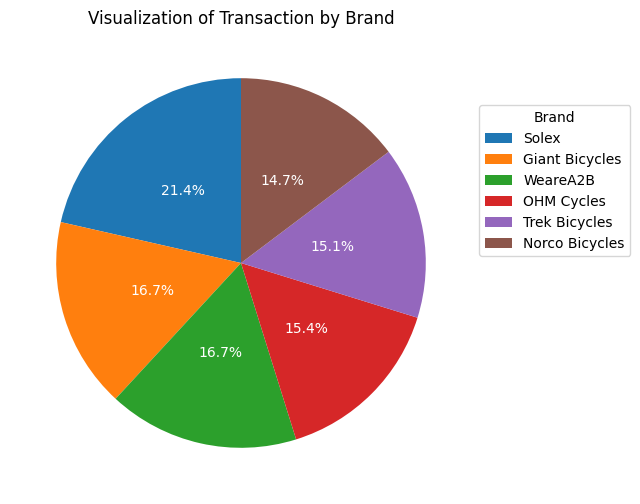

In [34]:
count_brand=EDA['brand'].value_counts()
plt.figure(figsize=(6,6))
wedges, texts, autotexts=plt.pie(
    count_brand.values,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.5,
    textprops={'color':'white'}
)
plt.title('Visualization of Transaction by Brand')
plt.legend(wedges, count_brand.index, title='Brand', loc='lower left', bbox_to_anchor=(1,0.5))
plt.show()

### Insigt

Based on the visualisation of bicycle transaction numbers by brand, it can be concluded that bicycle sales from various brands are relatively evenly distributed and no single brand is overly dominant, meaning that every brand has sales potential. In addition, Solex has the highest number of transactions compared to other brands, at around 21.4%. The WeareA2B and Giant Bicycles brands have the same transaction percentage, while Norco Bicycles has the lowest number of transactions compared to other brands, at around 14.7%.


## Which State Has the Highest Number of Customers?

In [35]:
State_analysis=EDA.groupby(by=['state']).agg({
    "customer_id":"nunique"
}).sort_values(by='customer_id', ascending=False)

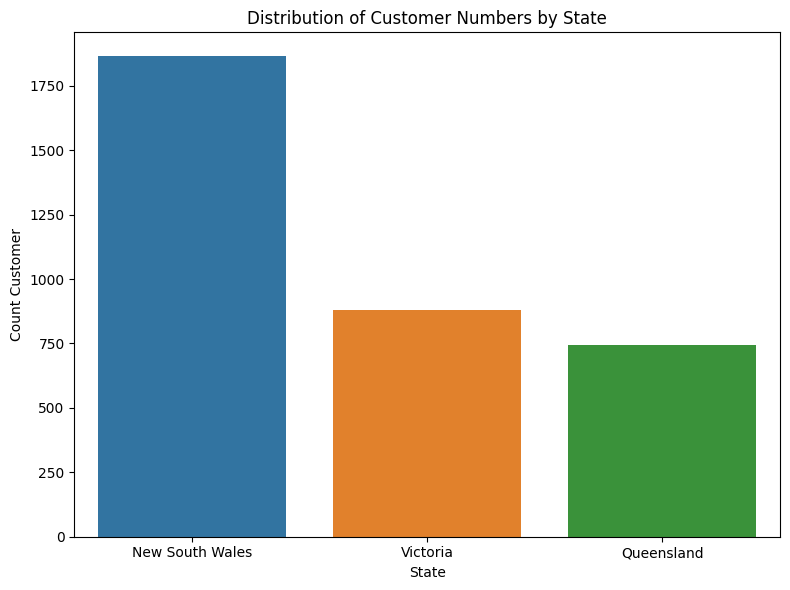

In [36]:
plt.figure(figsize=(8,6))
sns.barplot(
    State_analysis.reset_index(),
    x='state',
    y='customer_id'
)
plt.title('Distribution of Customer Numbers by State')
plt.xlabel('State')
plt.ylabel('Count Customer')
plt.tight_layout()
plt.show()

### Insight
Based on the visualisation of bicycle transaction numbers by state in Australia, New South Wales has the highest number of customers purchasing bicycles compared to other states. On the other hand, Queensland has the fewest number of customers compared to other states.

## Which Bicycle Brand Has High Sales?

In [37]:
Sales_by_brand=EDA.groupby(by='brand').agg({
    "list_price":'sum'
}).sort_values(by='list_price', ascending=False)

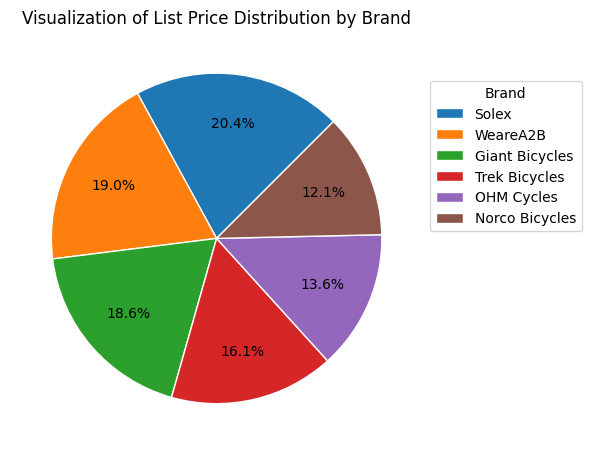

In [38]:
labels=Sales_by_brand.index
sizes=Sales_by_brand['list_price']

legend_labels=[f"{label}" for label in labels]
plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    autopct='%1.1f%%',
    startangle=45,
    wedgeprops={'edgecolor':'white'},
    pctdistance=0.7
)

plt.legend(
    legend_labels,
    title='Brand',
    loc='lower left',
    bbox_to_anchor=(1,0.5)
)
plt.title('Visualization of List Price Distribution by Brand')
plt.tight_layout()
plt.show()


### Insight
Based on the visualisation of bicycle sales by brand, it was found that Solex bicycles had the highest sales compared to other bicycle brands. In addition, the WeareA2B, Giant Bicycles, and Trek Bicycles brands showed relatively similar sales levels, so it can be concluded that these three brands have good sales potential. Meanwhile, Norco Bicycles had the lowest sales compared to other bicycle brands.

## How is the Monthly Bicycle Sales Trend?

In [39]:
Sales_Month=EDA.groupby(by='Month').agg({
    "list_price":"sum"
})

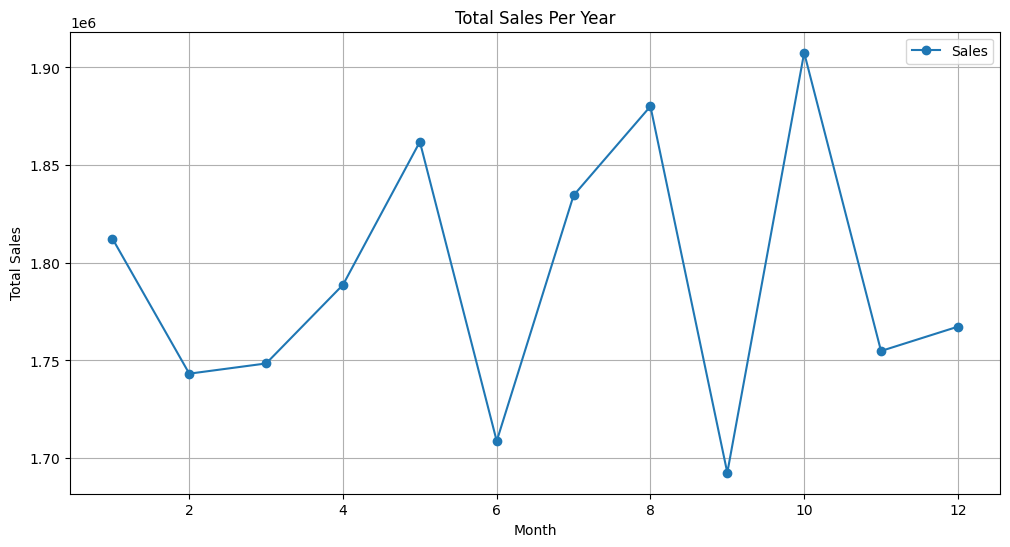

In [40]:
Sales_Month=Sales_Month.reset_index()

plt.figure(figsize=(12,6))
plt.plot(Sales_Month['Month'], Sales_Month['list_price'], marker='o', label='Sales')

plt.title('Total Sales Per Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()

### Insight
Based on the visualization of monthly bicycle sales in Australia, it can be seen that bicycle sales fluctuate form month to month. In the period from September to October, bicycle sales showed a significant increase, reaching around 215072.2 AUD. However, in the period from October to November, bicycle sales declined significantly, reaching around 152702.82 AUD, compared to other period

## Which Category of Bicycle Has the Highest Sales?

In [41]:
Product_Line_Sales=EDA.groupby(by='product_line').agg({
    "list_price":"sum"
}).sort_values(by='list_price', ascending=False)

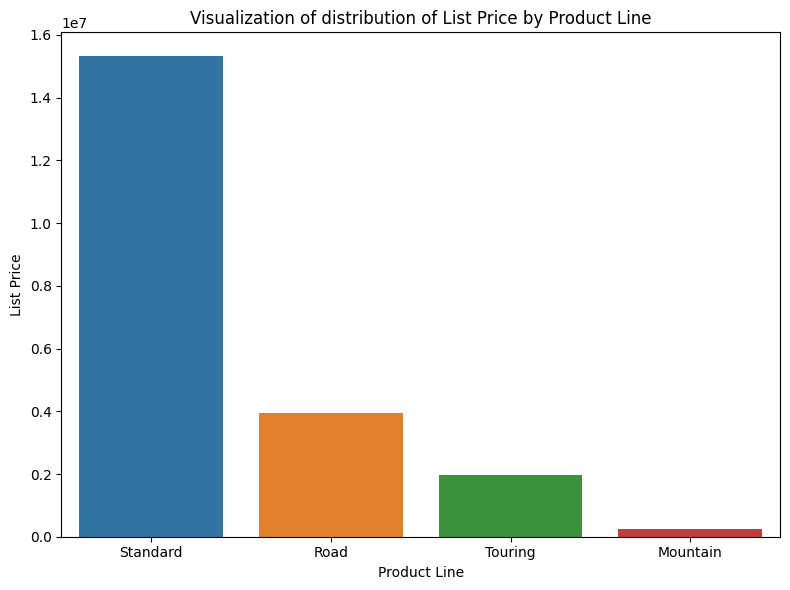

In [42]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=Product_Line_Sales.reset_index(),
    x='product_line',
    y='list_price'

)
plt.title('Visualization of distribution of List Price by Product Line')
plt.xlabel('Product Line')
plt.ylabel('List Price')
plt.tight_layout()
plt.show()

### Insight
Based on the visualisation of sales distri that bution by product class, it can be seen that the Standard product class has the highest and most dominant sales compared to other product classes. It shows that most customers prefer to buy bicycles for daily use at more affordable prices, rather than for specific activities such as racing or mountain biking. Meanwhile, the Mountain product class has the lowest sales compared to other product classes.

## Which Gender Frequently Buys Bicycles?

In [43]:
Gender_of_Customer=EDA.groupby(by='gender').agg({
    'customer_id':'nunique'
})

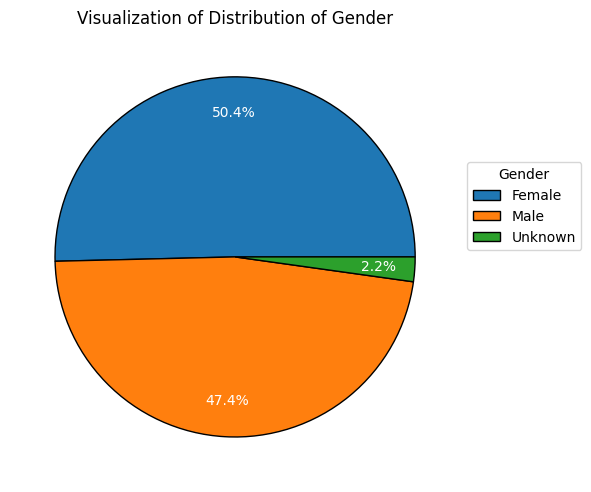

In [44]:
labels=Gender_of_Customer.index
sizes=Gender_of_Customer['customer_id']

legend_labels=[f"{label}" for label in labels]

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    autopct='%1.1f%%',
    wedgeprops={'edgecolor':'black'},
    textprops={'color':'white'},
    pctdistance=0.8
)

plt.legend(
    legend_labels,
    title='Gender',
    loc='lower left',
    bbox_to_anchor=(1,0.5)
)
plt.title('Visualization of Distribution of Gender')
plt.tight_layout()
plt.show()

### Insight
Based on customer visualization by gender, it can be seen that female bicycle buyers are the most numerous. However, the percentage difference between male and female buyers is relatively small, at around 3%. In addition, there are a number of customers who did not provide gender information, with a percentage of around 2.2%

## Which Region Has the Highest Sales of Bicycyles?

In [45]:
List_Price_State=EDA.groupby(by='state').agg({
    "list_price":"sum"
}).sort_values(by='list_price', ascending=False)

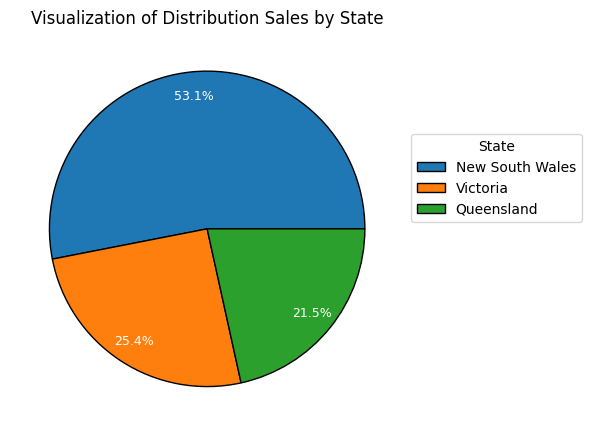

In [46]:
labels=List_Price_State.index
sizes=List_Price_State['list_price']

legend_labels=[f"{label}" for label in labels]

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    autopct='%1.1f%%',
    wedgeprops={'edgecolor':'black'},
    textprops={
        'color':'white',
        'fontsize':9
        },
    pctdistance=0.85
)
plt.legend(
    legend_labels,
    title='State',
    loc='lower left',
    bbox_to_anchor=(1,0.5)
)
plt.title('Visualization of Distribution Sales by State')
plt.tight_layout()
plt.show()

### Insight
Based on the visualisation of bicycle sales by state in Australia, it was found that New South Wales had the highest sales distribution compared to other states, contributing more than half of total sales. In addition, Victoria and Queensland also showed great potential in supporting increased bicycle sales.

## How are Customers Distributed Based on Wealth Segment?

In [47]:
Wealth_Customer=EDA.groupby(by='wealth_segment').agg({
    'customer_id':'nunique'
}).sort_values(by='customer_id', ascending=True)

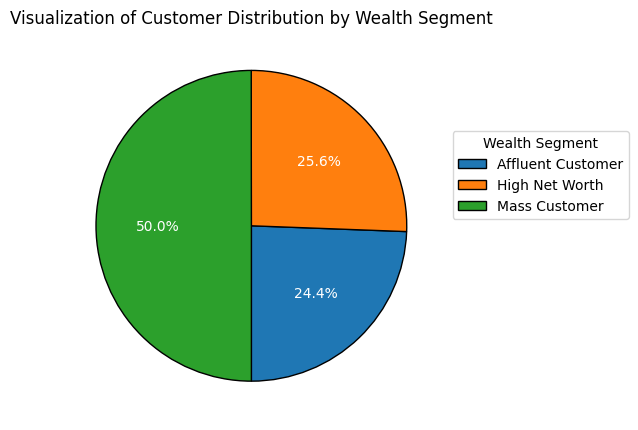

In [48]:
labels=Wealth_Customer.index
sizes=Wealth_Customer['customer_id']

legend_labels=[f"{label}" for label in labels]

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    autopct='%1.1f%%',
    wedgeprops={'edgecolor':'black'},
    textprops={'color':'white'},
    startangle=-90
)

plt.legend(
    legend_labels,
    title='Wealth Segment',
    loc='lower left',
    bbox_to_anchor=(1,0.5)
)

plt.title('Visualization of Customer Distribution by Wealth Segment')
plt.tight_layout()
plt.show()

### Insight

Based on the visualisation of customer distribution by wealth segment, it can be seen that the Mass Customer segment has the highest sales compared to other segments. This shows that most customers buy bicycles because of their affordable prices and daily use needs.
Meanwhile, the High Net Worth and Affluent Customer segments have almost the same percentage. Although their numbers are smaller than the Mass Customer segment, these two segments have great potential in supporting increased bicycle sales, especially for products with higher value and features.


## 

In [49]:
Product_class_sales=EDA.groupby(by='product_class').agg({
    "list_price":sum
})

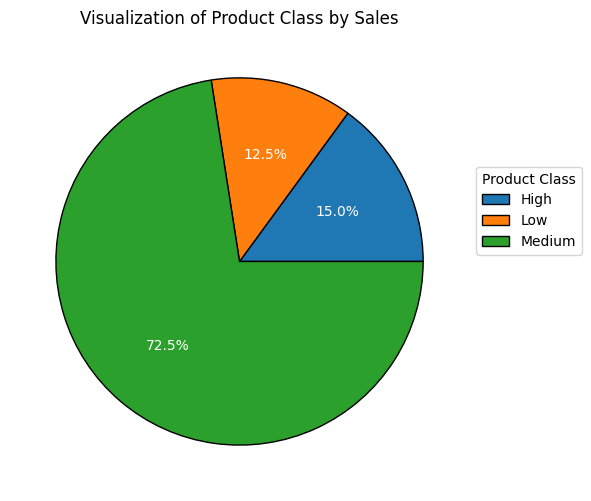

In [50]:
labels=Product_class_sales.index
sizes=Product_class_sales['list_price']

legend_labels=[f"{label}" for label in labels]
plt.figure(figsize=(6,6))

plt.pie(
    sizes,
    autopct='%1.1f%%',
    wedgeprops={'edgecolor':'black'},
    textprops={'color':'white'}
)

plt.legend(
    legend_labels,
    title='Product Class',
    loc='lower left',
    bbox_to_anchor=(1,0.5)
)

plt.title('Visualization of Product Class by Sales')
plt.tight_layout()
plt.show()

### Insight
Based on sales visualisation by product class, bicycles in the Medium product class had the highest sales value compared to other product classes, accounting for almost three-quarters of total sales. This shows that consumers tend to choose medium-quality bicycles because they offer more affordable prices with reasonably good quality. Meanwhile, the Low and High product classes had much lower sales percentages than the Medium product class.

## Conclusion
Based on the analysis results, it can be concluded that bicycle sales in 2017 experienced fluctuations. A significant increase in sales occurred in the period from September to October, amounting to AUD 215,072.2, while the most significant decline in sales occurred in the period from August to September, amounting to AUD 152,702.82.

Bicycle sales were mainly concentrated in the states of New South Wales, Victoria, and Queensland, with New South Wales being the region with the highest sales. In addition, each bicycle brand showed potential in supporting overall sales.

In terms of products, the most purchased bicycles were in the medium price category. This shows that customers tend to choose bicycles that are affordable but still of good quality. The most popular bicycle category was Standard, indicating that most customers bought bicycles for daily use, rather than for specific activities such as racing or mountain biking.

In [51]:
Bikes_Sales_df.to_csv('Bikes_Sales_df.csv', index=False)